# Tutorial 11: DeepWalk and node2vec - Implementation details
  

Paper:
* [DeepWalk: Online Learning of Social Representation](https://arxiv.org/pdf/1403.6652.pdf)  
* [node2vec: Scalable Feature Learning for Networks](https://arxiv.org/pdf/1607.00653.pdf)  

Code:

 * [node2vec doc](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html?highlight=node2vec#torch_geometric.nn.models.Node2Vec)
 * [node2vec code](https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/models/node2vec.html)
 * [Example on clustering](https://github.com/rusty1s/pytorch_geometric/blob/master/examples/node2vec.py)

# Setup

In [1]:
#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [2]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2 --extra-index-url https://download.pytorch.org/whl/cu118
# Install torch-scatter
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-sparse
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-cluster
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-spline-conv
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-geometric
!pip install torch-geometric


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 813.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 3.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html


In [3]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.0.1+cu118
CUDA version: 11.8


In [4]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm

In [5]:
dataset = 'Cora'
path = osp.join('.', 'data', dataset)
dataset = Planetoid(path, dataset)
data = dataset[0]

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=128,
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=20,
                 num_negative_samples=1,
                 p=200, q=1,                             # bias parameters
                 sparse=True).to(device)

# Random walks

### The data loader

In [7]:
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [8]:
for idx, (pos_rw, neg_rw) in enumerate(loader):
    print(idx, pos_rw.shape, neg_rw.shape)

0 torch.Size([28160, 10]) torch.Size([28160, 10])
1 torch.Size([28160, 10]) torch.Size([28160, 10])
2 torch.Size([28160, 10]) torch.Size([28160, 10])
3 torch.Size([28160, 10]) torch.Size([28160, 10])
4 torch.Size([28160, 10]) torch.Size([28160, 10])
5 torch.Size([28160, 10]) torch.Size([28160, 10])
6 torch.Size([28160, 10]) torch.Size([28160, 10])
7 torch.Size([28160, 10]) torch.Size([28160, 10])
8 torch.Size([28160, 10]) torch.Size([28160, 10])
9 torch.Size([28160, 10]) torch.Size([28160, 10])
10 torch.Size([28160, 10]) torch.Size([28160, 10])
11 torch.Size([28160, 10]) torch.Size([28160, 10])
12 torch.Size([28160, 10]) torch.Size([28160, 10])
13 torch.Size([28160, 10]) torch.Size([28160, 10])
14 torch.Size([28160, 10]) torch.Size([28160, 10])
15 torch.Size([28160, 10]) torch.Size([28160, 10])
16 torch.Size([28160, 10]) torch.Size([28160, 10])
17 torch.Size([28160, 10]) torch.Size([28160, 10])
18 torch.Size([28160, 10]) torch.Size([28160, 10])
19 torch.Size([28160, 10]) torch.Size([28

In [9]:
idx, (pos_rw, neg_rw) = next(enumerate(loader))

In [10]:
idx

0

In [11]:
(pos_rw.shape, neg_rw.shape)

(torch.Size([28160, 10]), torch.Size([28160, 10]))

In [12]:
pos_rw

tensor([[1756, 1358, 1757,  ...,  111, 1358, 1471],
        [2299, 2297, 2299,  ..., 1795, 2299, 2297],
        [1572,  236, 2078,  ..., 2045, 2026, 2045],
        ...,
        [ 213,  144,  145,  ...,  213,  145, 1165],
        [ 347,  525,  415,  ..., 1630,  737, 1974],
        [  47,  163,   47,  ..., 1579,   47, 1579]])

In [13]:
neg_rw

tensor([[1756,  864, 2269,  ..., 1121,   57, 1771],
        [2299, 2371,  793,  ...,   14, 2230,  894],
        [1572,  356, 2121,  ...,  820,   16,  340],
        ...,
        [2343, 1144, 2170,  ...,  986,  537, 1769],
        [ 430, 1299, 1161,  ..., 1841, 1825,  159],
        [1813, 1847, 1058,  ..., 2141,  532, 2365]])

### Visualization

In [14]:
import networkx as nx
edge_tuples = [tuple(x) for x in data.edge_index.numpy().transpose()]
G = nx.from_edgelist(edge_tuples)
pos = nx.spring_layout(G, center=[0.5, 0.5])
nx.set_node_attributes(G, pos, 'pos')

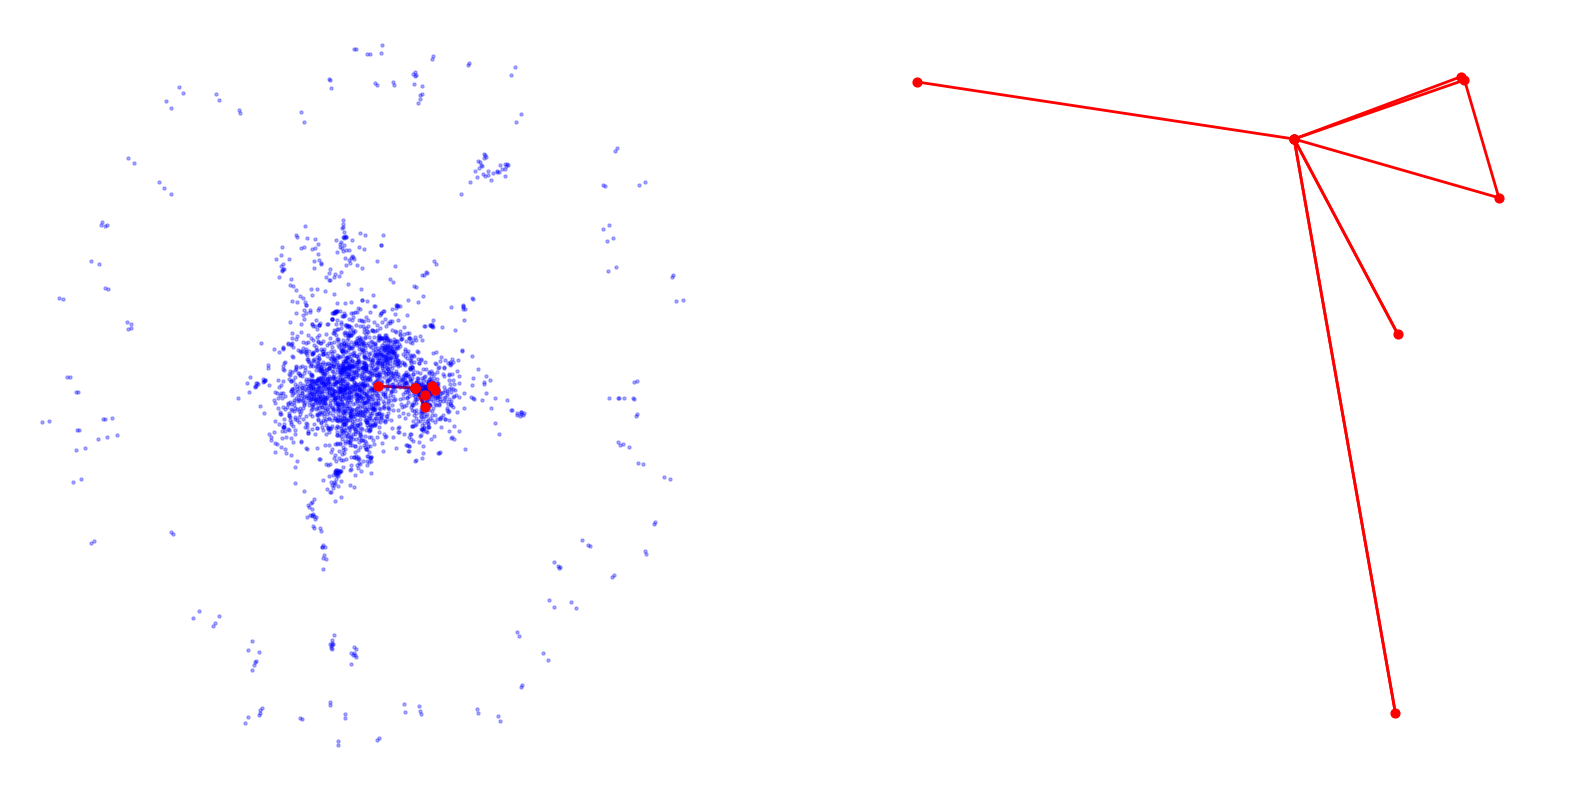

In [15]:
nodelist = next(enumerate(loader))[1][0][0].tolist()
walk = nx.path_graph(len(nodelist))
nx.set_node_attributes(walk, {idx: pos[node_id] for idx, node_id in enumerate(nodelist)}, 'pos')

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
nx.draw_networkx_nodes(G,
                       ax=ax,
                       pos=nx.get_node_attributes(G, 'pos'),
                       node_size=5,
                       alpha=0.3,
                       node_color='b')
nx.draw(walk,
        node_size=40,
        node_color='r',
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'),
        width=2,
        edge_color='r')
ax = fig.add_subplot(1, 2, 2)
nx.draw(walk,
        node_size=40,
        node_color='r',
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'),
        width=2,
        edge_color='r')

# Training

### Model definition

In [16]:
model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=20,
                 context_size=10, walks_per_node=10,
                 num_negative_samples=1, p=1, q=1, sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

### Training function

In [17]:
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in tqdm(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

### Test function

In [18]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [19]:
data.y

tensor([3, 4, 4,  ..., 3, 3, 3])

In [20]:
data.y.unique()

tensor([0, 1, 2, 3, 4, 5, 6])

In [21]:
@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

### Training

In [23]:
for epoch in range(1, 20):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 0.8247, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 02, Loss: 0.8243, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 03, Loss: 0.8241, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 04, Loss: 0.8244, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 05, Loss: 0.8236, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 06, Loss: 0.8244, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 07, Loss: 0.8244, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 08, Loss: 0.8231, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 09, Loss: 0.8250, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 10, Loss: 0.8238, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 11, Loss: 0.8250, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 12, Loss: 0.8248, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 13, Loss: 0.8235, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 14, Loss: 0.8237, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 15, Loss: 0.8234, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 16, Loss: 0.8243, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 17, Loss: 0.8248, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 18, Loss: 0.8261, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 19, Loss: 0.8230, Acc: 0.7110


### Visualization

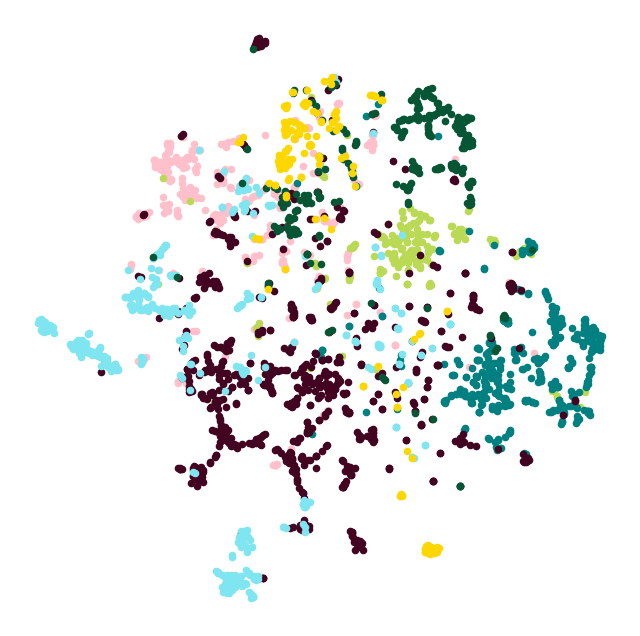

In [25]:
@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700'
]
plot_points(colors)

A review using the partial order

In [42]:
import numpy as np
import torch
from torch_geometric.nn import Node2Vec
import networkx as nx
from torch_geometric.utils import from_networkx


In [43]:
num_nodes = 4
adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
edges = [(0, 1), (0, 2), (1, 3), (2, 3)]
for u, v in edges:
    adj_matrix[u, v] = 1


print("Adjacency Matrix:")
print(adj_matrix)

Adjacency Matrix:
[[0 1 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 0]]


In [44]:
# Step 2: Convert to edge_index
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
edge_index = torch.tensor(list(G.edges)).t().contiguous()

print("Edge Index:")
print(edge_index)

Edge Index:
tensor([[0, 0, 1, 2],
        [1, 2, 3, 3]])


In [45]:
data = from_networkx(G)
# Edge index for PyTorch Geometric
edge_index = data.edge_index

# Initialize Node2Vec model
embedding_dim = 64
node2vec = Node2Vec(
    edge_index=edge_index,
    embedding_dim=embedding_dim,
    walk_length=10,
    context_size=5,
    walks_per_node=20,
    num_negative_samples=1,
    sparse=True
)



In [46]:

# Train Node2Vec
def train_node2vec(model):
    loader = model.loader(batch_size=128, shuffle=True)
    optimizer = torch.optim.SparseAdam(model.parameters(), lr=0.01)
    model.train()
    for epoch in range(1, 101):
        total_loss = 0
        for pos_rw, neg_rw in loader:
            optimizer.zero_grad()
            loss = model.loss(pos_rw, neg_rw)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {total_loss / len(loader):.4f}')

train_node2vec(node2vec)

Epoch 10, Loss: 8.7266
Epoch 20, Loss: 9.6194
Epoch 30, Loss: 8.5304
Epoch 40, Loss: 9.0740
Epoch 50, Loss: 9.0037
Epoch 60, Loss: 9.1968
Epoch 70, Loss: 9.3182
Epoch 80, Loss: 9.6372
Epoch 90, Loss: 8.5022
Epoch 100, Loss: 9.2690


In [47]:
node_embeddings = node2vec.embedding.weight.detach()

In [56]:
# Simple mean pooling to get a graph-level embedding
graph_embedding = torch.mean(node_embeddings, dim=0)
graph_embedding

tensor([-0.0283,  0.0931,  0.7000, -1.0883, -0.2292,  0.1502,  0.4518, -0.0236,
         0.1565,  0.2821, -0.4084,  1.0310,  0.0415,  0.5594,  0.4010,  0.1067,
         0.0016,  0.3525, -0.7337,  0.3970,  0.1461,  0.1041,  0.1452, -0.6518,
         0.7949, -0.8081, -0.5623, -0.0657,  0.0526,  0.2998,  0.0550, -0.3457,
        -0.6829, -0.0043, -0.1339, -0.2940, -1.1141,  0.0934,  0.3287, -0.5550,
        -0.8398,  0.0509, -0.0474,  0.0685, -0.3199,  0.2455, -0.2010, -1.0221,
         0.7506, -0.0481,  0.1189,  0.6848, -0.2401, -0.4629, -0.9888,  0.2041,
         0.5453, -0.0530,  0.0198,  0.2429,  0.6024, -0.0115, -0.3982, -1.0228])

Number of nodes: 4


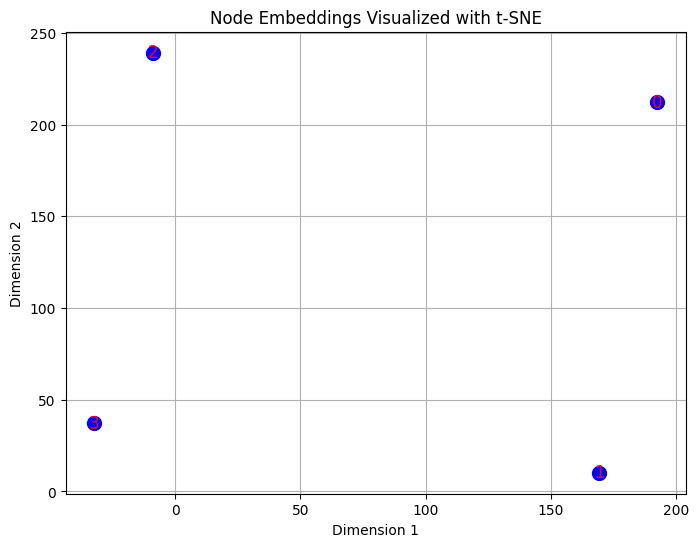

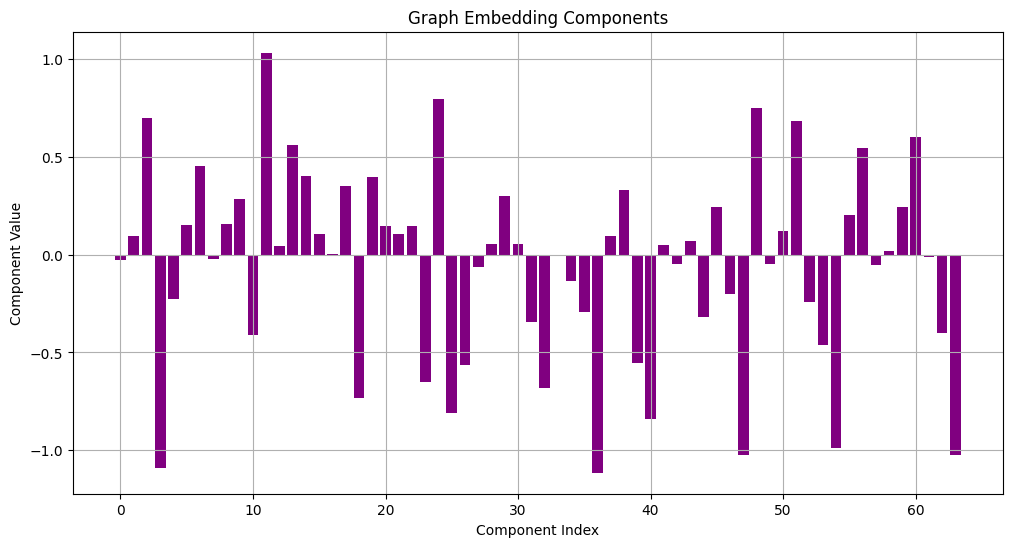

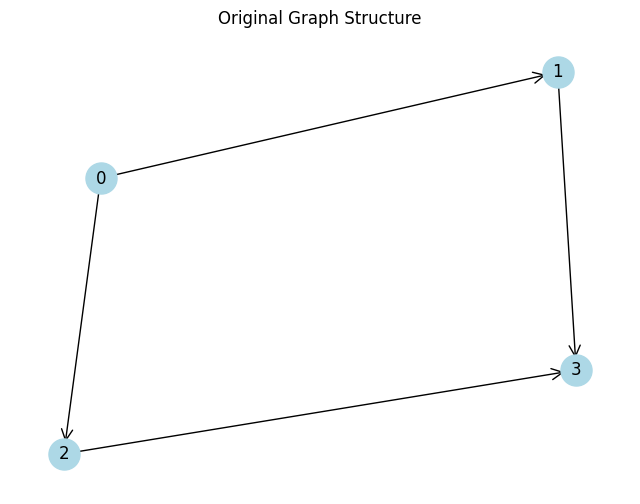

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from torch_geometric.nn import Node2Vec
import networkx as nx
from torch_geometric.utils import from_networkx

# Ensure node_embeddings is a NumPy array
node_embeddings_np = node_embeddings.cpu().numpy()

# Determine the number of nodes
num_nodes = node_embeddings_np.shape[0]
print(f"Number of nodes: {num_nodes}")

# Set perplexity to less than num_nodes
perplexity_value = min(5, num_nodes - 1)

# Apply t-SNE to reduce embeddings to 2 dimensions
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
node_embeddings_2d = tsne.fit_transform(node_embeddings_np)

plt.figure(figsize=(8, 6))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], s=100, color='blue')
for i, (x, y) in enumerate(node_embeddings_2d):
    plt.text(x, y, str(i), fontsize=12, ha='center', va='center', color='red')
plt.title('Node Embeddings Visualized with t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

# Graph embedding components visualization
graph_embedding_np = graph_embedding.cpu().numpy()
plt.figure(figsize=(12, 6))
plt.bar(range(len(graph_embedding_np)), graph_embedding_np, color='purple')
plt.title('Graph Embedding Components')
plt.xlabel('Component Index')
plt.ylabel('Component Value')
plt.grid(True)
plt.show()

# Visualize the original graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Original Graph Structure')
plt.axis('off')
plt.show()


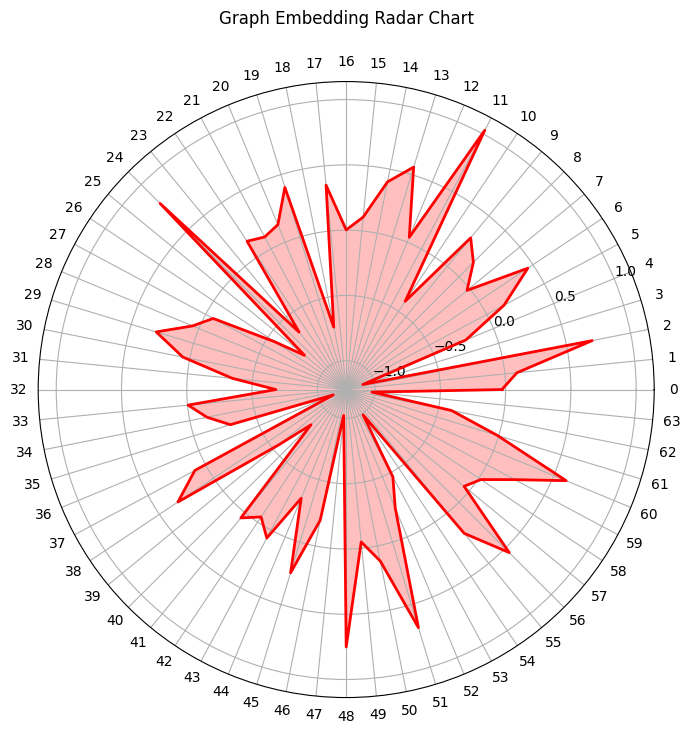

In [58]:
from math import pi

# Number of variables we're plotting (number of components)
num_vars = len(graph_embedding_np)

# Split the circle into equal parts and save the angles
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Values for plotting, repeat the first value to close the circle
values = graph_embedding_np.tolist()
values += values[:1]

# Initialize the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], range(num_vars))

# Plot data
ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.25)

# Set the range of the radial axis
plt.title('Graph Embedding Radar Chart', y=1.08)
plt.show()


In [ ]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Custom Dataset Class
class PosetDataset(Dataset):
    def __init__(self, graph_embeddings, targets):
        self.graph_embeddings = graph_embeddings
        self.targets = targets

    def __len__(self):
        return len(self.graph_embeddings)

    def __getitem__(self, idx):
        return self.graph_embeddings[idx], self.targets[idx]

# Prepare dataset (example with dummy data)
# In practice, you need to generate multiple posets and compute their embeddings and targets
graph_embeddings_list = [graph_embedding]  # List of graph embeddings
targets = [np.log(num_linear_extensions)]  # Log-transformed target

dataset = PosetDataset(graph_embeddings_list, targets)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Define Neural Network Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x)

model = RegressionModel(input_dim=embedding_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training Loop
def train_model(model, dataloader, epochs=100):
    model.train()
    for epoch in range(epochs):
        for batch in dataloader:
            inputs, targets = batch
            optimizer.zero_grad()
            outputs = model(inputs.float()).squeeze()
            loss = criterion(outputs, targets.float())
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

train_model(model, dataloader)
